In [3]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

	1. Considera la secuencia de t-discreto x(n) = 3cos(πn/8) - 2sin(3πn/12). Indica dos ternas de valores (F1,F2,Fs) que generen ésta misma secuencia. 
    Nota: F1 y F2 corresponden a las frecuencias en Hz de los términos en coseno y seno respectivamente de una señal de t-continuo y Fs es su frecuencia de muestreo también en Hz.

#### Considerando Fs = 100 Hz:

2π(F1/Fs)n = πn/8 -> F1 = 6,25 Hz.

2π(F2/Fs)n = 3πn/12 - > F2 = 12,5 Hz.


#### Considerando Fs = 200 Hz:

2π(F1/Fs)n = πn/8 -> F1 = 12,5 Hz.

2π(F2/Fs)n = 3πn/12 - > F2 = 25 Hz.

In [4]:
Fs1 = 100
Fs2 = 200
n1 = np.arange (0,50)
xn1 = 3*np.cos (np.pi*n1/8) - (2*np.sin(3*np.pi*n1/12))
F1a,F2a,F1b,F2b = 6.25 , 12.5 , 12.5 , 25 
t1 = n1/Fs1
t2 = n1/Fs2


xt1a = 3*np.cos (2*np.pi*t1*F1a) - (2*np.sin(2*np.pi*t1*F2a))
xt1b = 3*np.cos (2*np.pi*t2*F1b) - (2*np.sin(2*np.pi*t2*F2b))

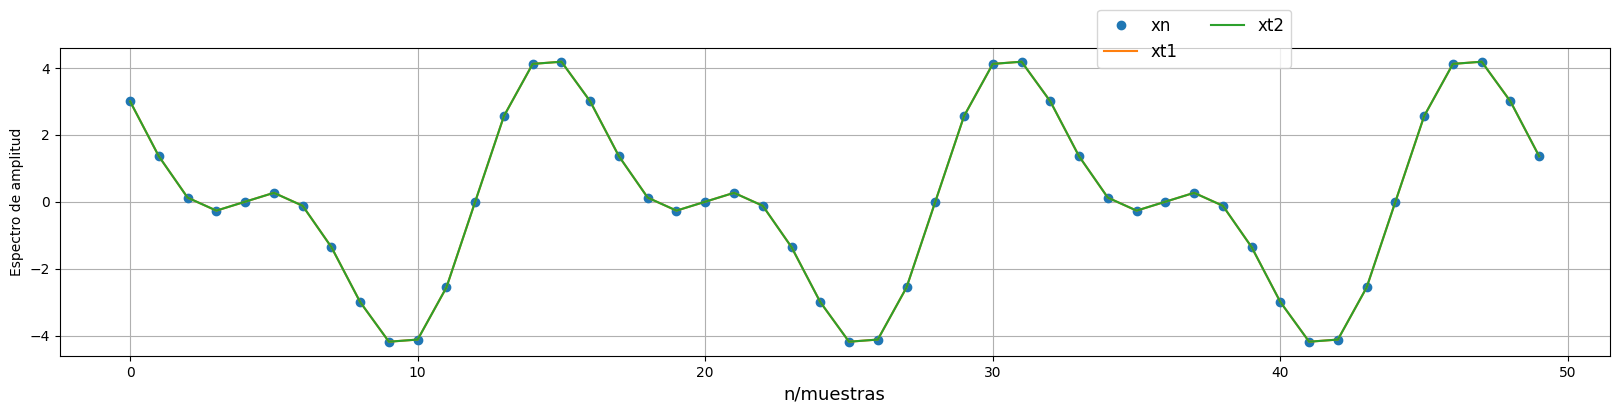

In [5]:
plt.figure(figsize=(20,4))
plt.plot(n1,xn1,"o")
plt.plot(t1*Fs1,xt1a)
plt.plot(t2*Fs2,xt1b)
plt.xlabel('n/muestras', fontsize=13)
plt.ylabel('Espectro de amplitud')
plt.legend(('xn','xt1',"xt2"),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.grid(True)
plt.show()

	2. Suponga que la función h(t) representa una señal de ECG cuando el corazón se encuentra en fibrilación ventricular.

	a) Grafica la señal h(t).

	b) Muestrea la señal con una Fs que considere apropiada y tomando ciclos completos. 

	c) Encuentra y grafica su espectro de amplitud en escala logarítmica y su espectro de fase en escala lineal. 


### Apartado A

In [6]:
t2 = np.arange(0,10,0.001) 
fc = 1.91
h = sum(    ( 10**(-2) / (np.pi*(2*n2**2-1)) ) * np.cos (2*np.pi*(n2-1) * fc * t2 + (3*n2**3-1) * (np.pi/5)) - (10**(-7) / (2*(n2**2)*np.pi)) * (3*n2**5-(1/n2)) * (np.pi/2) * np.sin((5/7) * np.pi * ((5/7) * n2-1) * fc * t2 - (3*n2**(3/2) - 1) * np.pi/2) for n2 in np.arange(1,18,1)     ) -  (10**(-3))

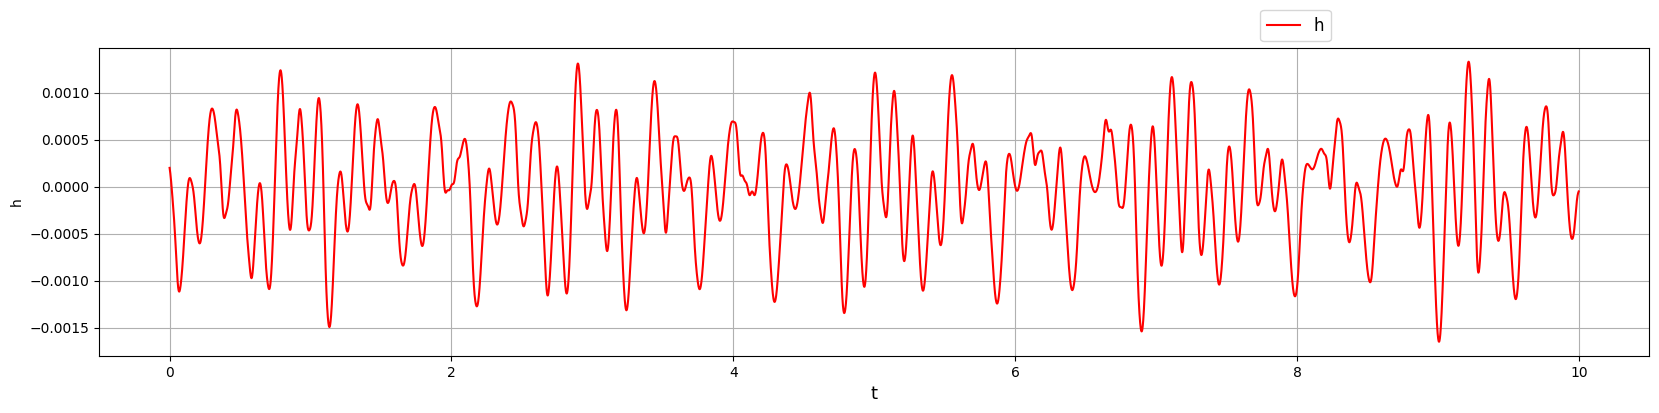

In [7]:
plt.figure(figsize=(20,4))
plt.plot(t2,h,color="red")
plt.xlabel('t', fontsize=13)
plt.ylabel('h')
plt.legend(('h(t)'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.grid(True)
plt.show()

### Apartado B

#### Se puede observar que nuestra señal tiene componentes de senos y cosenos con frecuencia fc. Entonces (ya que n va de 1 a 17) podemos decir que nuestra fmax = 16*fc. 

#### Elijo Fs_2 = 100 Hz ya que para que sea un buen muestreo Fs > Fmax = 30.56 por lo que adopto 100 Hz para asegurar un correcto muestreo.

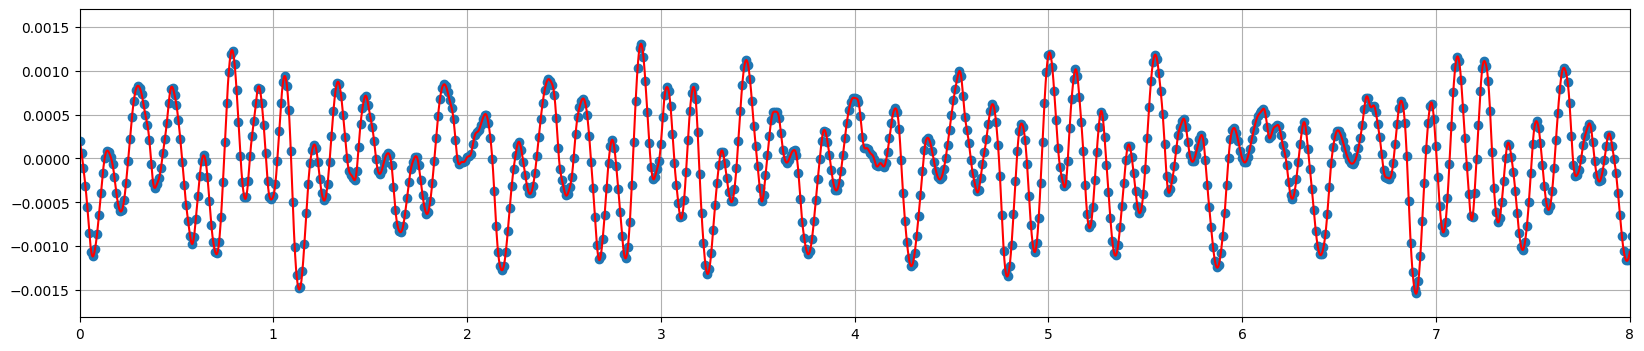

In [8]:
fmax = 16*fc
Fs_2 = 100 
n_2b = np.arange(0,len(t2)*Fs_2)
hn2 = sum(    ( 10**(-2) / (np.pi*(2*n2**2-1)) ) * np.cos (2*np.pi*(n2-1) * (fc/Fs_2) * n_2b + (3*n2**3-1) * (np.pi/5)) - (10**(-7) / (2*(n2**2)*np.pi)) * (3*n2**5-(1/n2)) * (np.pi/2) * np.sin((5/7) * np.pi * ((5/7) * n2-1) * (fc/Fs_2) * n_2b - (3*n2**(3/2) - 1) * np.pi/2) for n2 in np.arange(1,18,1)     ) -  (10**(-3))
plt.figure(figsize=(20,4))
plt.plot(n_2b/Fs_2,hn2,'o')
plt.plot(t2,h,color="red")
plt.grid (True)
plt.xlim (0,8)
plt.show()

### Apartado C

In [9]:
from scipy.fftpack import fft, fftfreq, ifft
from FTransformaciones_tiempo_frecuencia import Espectro, señal

importing Jupyter notebook from FTransformaciones_tiempo_frecuencia.ipynb


In [10]:
c2 = Espectro(hn2)
p2 = np.arange(len(c2))

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(p2,abs(c2))
plt.yscale("log")
plt.xlabel('n/muestras')
plt.title('Espectro de amplitud')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(p2,np.angle(c2)*180/np.pi)
plt.xlabel('n/muestras')
plt.title('Espectro de fase')
plt.grid(True)
plt.show()

- - -

	3. Dada la señal x(n)=2 cos⁡(2π F/Fs n+ α)+15 con F = 60Hz,Fs = 1200Hz y α = π/4, contamínala con ruido gaussiano de media nula y desvío estándar 10. Determina el espectro de la señal contaminada de modo que la SN(dB) sea mayor que 25.

In [ ]:
F3 = 60
Fs3 = 1200
me = 0
dest = 10
n3 = np.arange(0,1000)
a = np.pi/4
t3 = n3/Fs3
N3 = len (t3)

ruido3 = np.random.normal(me,dest, N3)
xn3 = 2*np.cos(2*np.pi*(F3/Fs3) + a) + 15 
x_r3 = xn3 + ruido3

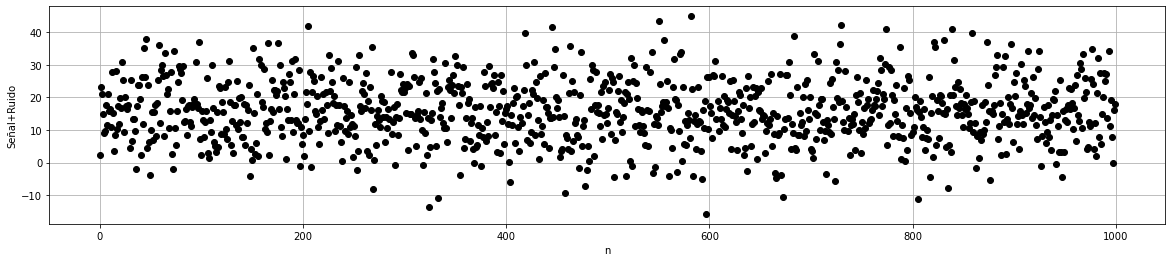

In [ ]:
plt.figure (figsize =(20,4))
plt.plot(n3,x_r3,"ko")
plt.xlabel ("n")
plt.ylabel ("Señal+Ruido")
plt.grid (True)
plt.show ()

In [ ]:
from FTransformaciones_tiempo_frecuencia import Espectro, señal

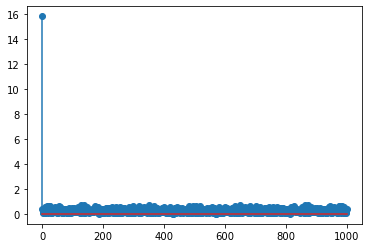

In [ ]:
Espec= Espectro(x_r3) 
n_3 = np.arange(len(Espec))

plt.stem(n_3,abs(Espec))
plt.show()

Se puede que en 0 hay valores demasiado elevados, es por eso que vamos a disminuirlo para mejorar la relación señal ruido.

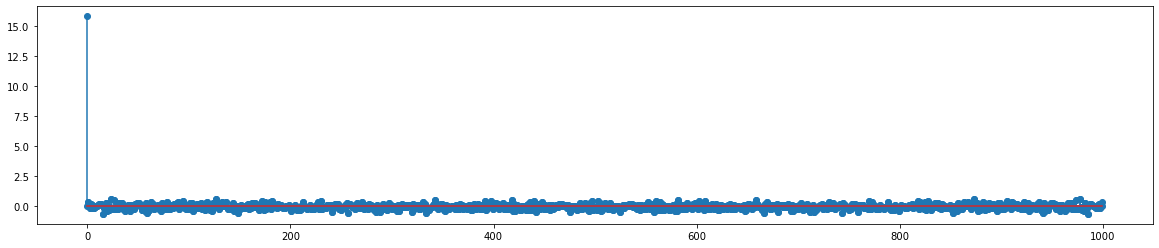

In [ ]:
NuevoEspec = np.zeros(len(Espec))
for i in range(len(Espec)):
    NuevoEspec[i] = Espec[i]
NuevoEspec[0] = 10**(-9)
NuevoEspec [100] = 10**(-9)
NuevoEspec[999] = 10**(-9)


plt.figure(figsize=(20,4))
plt.stem(n_3,Espec)
plt.stem(n_3,NuevoEspec)
plt.show()

In [ ]:
A = np.abs(np.max(Espec))
B = np.abs(np.max(NuevoEspec))
SN1 = 10*np.log(A/B)
print(SN1)

32.65315335803506


Se puede notar mejoría de la relación S/N.

- - -

    4. La señal del archivo emg_DP.xlsx, muestreada a 2kHz, corresponde al registro de EMG del músculo deltoides posterior, durante un movimiento de abducción-aducción durante un poco más de 48 s. Con segmentos de 700 ms de longitud: 

    (a) Construye 5 pdf elegidas aleatoriamente y compara una de ellas con ajustes de 4 distribuciones paramétricas continuas (normal, de cauchy, logística y gamma). Emplea como criterio de comparación el valor de la suma de los cuadrados de los desvíos (SSE). Construye una tabla con todos los ajustes realizados, en sentido creciente de SSE, agregando el valor óptimo de los parámetros de cada una de las distribuciones paramétricas continuas. 

    (b) Compara las 5 pdf entre si empleando al menos dos de las métricas estudiadas. Indica el criterio que utilizas para decidir si la señal es estacionaria con segmentos de 700 ms.

### Apartado A

In [ ]:
import bioread
import pandas as pd

In [ ]:
datos = pd.read_excel('emg_DP.xlsx', header = None)
datos = datos.to_numpy()

In [ ]:
datos.shape

(96557, 1)

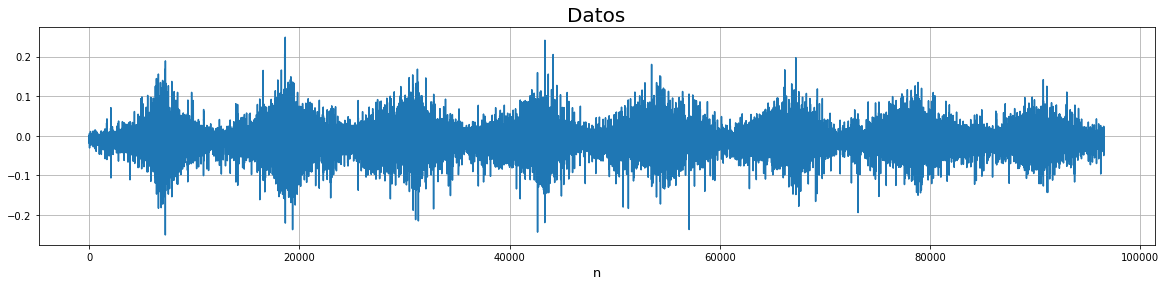

In [ ]:
N = 96557
Fs = 2000

n = np.arange (len(datos))
t = n/Fs

plt.figure(figsize=(20,4))
plt.plot(n,datos)
plt.xlabel('n',fontsize=13)
plt.title("Datos",fontsize=20)
plt.grid(True)
plt.show()

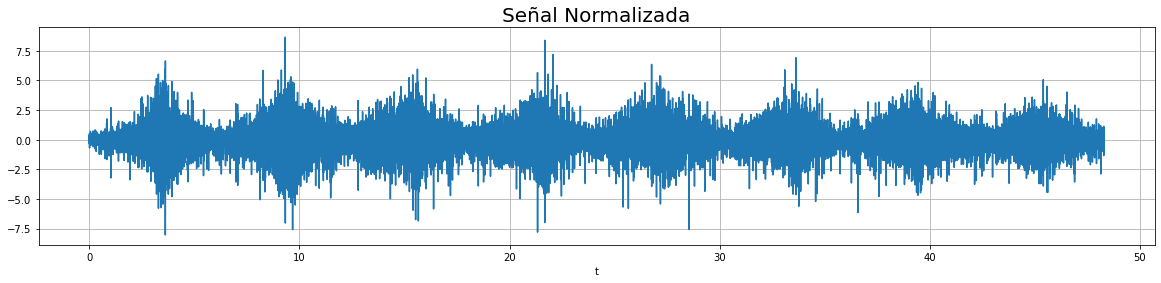

In [ ]:
s_norm = (datos - np.mean (datos)) / (np.std (datos))

plt.figure (figsize =(20,4))
plt.plot (t,s_norm)
plt.xlabel ("t")
plt.title ("Señal Normalizada",fontsize=20)
plt.grid (True)
#plt.xlim (0,1)
plt.show ()

In [ ]:
print (len (s_norm) // (Fs*0.7))
seg = int(Fs*0.7)
print (seg)

68.0
1400


In [ ]:
from FEstimaciondeunafdp_new1 import pdf_new1

In [ ]:
bigp = np.empty(0) #Matriz vacía en la que vamos a agregar los datos con lo que vamos a construir los pdf.
#Por cada longitud de segmento tenemos una matriz y cada una de ellas, vamos a elegir 10 filas.

bigY = np.empty(0,dtype=float)

dat = s_norm

Ndat = len(dat)

x0, xf, Np = -8, 8, 24000
d = (xf-x0)/Np #Vector de paso.
x = x0 + d*np.arange(Np)


datos = np.empty((int(seg),0)) #Genero una matriz donde guardaré los datos.
m = Ndat//seg #Cuántas columnas tendrá para cada caso, division: // = N° entero
aux = np.reshape(dat[0:seg*m],(int(seg),int(m)),order= 'F')
datos = np.append(datos, aux, axis=1) #Datos para cada longitud de segmento.
    #Ya inserte los datos para cada longitud de segmento, que se van agregando en forma de columnas.
    #Debo construir las fdp con la misma cantidad de datos.
    #Eleccion aleatoria. Hemos dicho q ibamos a tomar el peor de los casos: 764 columnas .
mi = np.random.choice(int(m),68,replace=False) #Elige aleatoriamente 818 numeros con las columnas que se va a quedar. Esto ya que dividimos en 100 segmentos.
    #Replace=false para que no se repitan los datos.
datos = datos[:,mi] #Nos quedamos con todas las filas y las columnas mi.
    #Hemos creado de nuevo la matriz pero más pequeña y todas las pdf se construiran con la misma cantidad de datos.
r = np.random.choice(seg,5,replace=False) #Elijo las 10 filas aleatoriamente.
p = datos[r,:]
bigp = np.append(bigp, p)
    
y1 = pdf_new1(p[0,:],x0,xf,Np,1); y2 = pdf_new1(p[1,:],x0,xf,Np,1) #1: nombre de la matriz, 2: lo que le agrego.
y3 = pdf_new1(p[2,:],x0,xf,Np,1); y4 = pdf_new1(p[3,:],x0,xf,Np,1) #1:los datos[fila,columnas],desde donde,hasta donde, cantidad de datos, valor que ajusta el ancho de banda.
y5 = pdf_new1(p[4,:],x0,xf,Np,1)

    #MATRIZ P DESDE DONDE SE CONSTRUYEN LAS FUNCIONES 
    #MATRIZ Y QUE JUNTA LAS FUNCIONES CONSTRUIDAS

Y = np.hstack((y1,y2,y3,y4,y5)) #Acumulo horizontalmente
bigY = np.append(bigY, Y)

In [ ]:
y = np.reshape(Y, (Np,5),order='F')

In [ ]:
y.shape

(24000, 5)

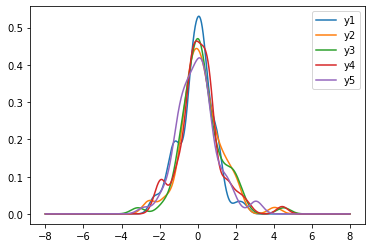

In [ ]:
plt.plot(x,y)
plt.legend(('y1','y2','y3','y4','y5'))
plt.show()

In [ ]:
from scipy.stats import norm, cauchy, gamma, logistic
from fitter import Fitter

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 35.48it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,6.202714,447.796802,-154.388395,inf,0.077809,0.775543
logistic,6.293398,409.412450,-153.401434,inf,0.069227,0.877845
norm,6.464684,399.665205,-151.575429,inf,0.094336,0.548694
gamma,6.501229,399.767123,-146.972592,inf,0.098822,0.489459


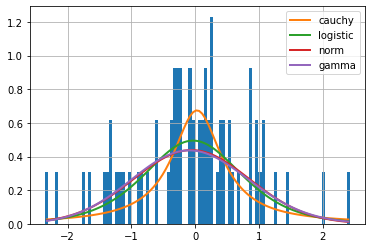

In [ ]:
distribuciones = ['norm','cauchy','gamma',"logistic"]
fitter = Fitter(p[0,:],distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=4,plot=True)

In [ ]:
fitter.fitted_param['cauchy'], fitter.fitted_param['logistic'], fitter.fitted_param['norm'] , fitter.fitted_param['gamma']

((0.02819611781189451, 0.4717006303905277),
 (-0.033661544591568046, 0.5052287115241701),
 (-0.05797374192200383, 0.9098115316847971),
 (653.9965898261653, -23.434345944779054, 0.03574537407043516))

In [ ]:
x_cauchy = x
y_cauchy = cauchy.pdf(x_cauchy, 0.02819611781189451, 0.4717006303905277)

x_logistic = x
y_logistic = logistic.pdf(x_logistic, -0.033661544591568046, 0.5052287115241701)

x_norm = x
y_norm = norm.pdf(x_norm, -0.05797374192200383, 0.9098115316847971)

x_gamma = x
y_gamma = gamma.pdf(x_gamma, 653.9965898261653, -23.434345944779054, 0.03574537407043516)

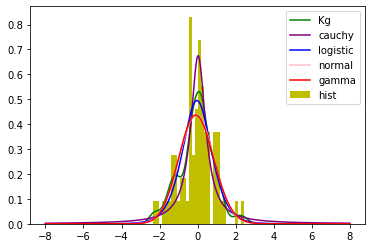

In [ ]:
plt.plot(x,y1,'g')
plt.plot(x_cauchy,y_cauchy,'purple')
plt.plot(x_logistic,y_logistic,'blue')
plt.plot(x_norm,y_norm,'pink')
plt.plot(x_gamma,y_gamma,'red')
plt.hist(p[0,:],bins=30,density=True,color='y')
plt.legend(('Kg','cauchy',"logistic","normal","gamma",'hist'))
plt.show()

In [ ]:
from FSum_of_square_error_SSE import sse

importing Jupyter notebook from FSum_of_square_error_SSE.ipynb


In [ ]:
H = np.histogram(p[0,:],bins=40,density=True)
yH = H[0]; xH = H[1][:-1]

In [ ]:
sse_kG = sse(xH,yH,x,y1)
sse_kG

1.337572565869197

In [ ]:
sse_cauchy = sse(xH,yH,x_cauchy,y_cauchy)
sse_cauchy

1.4071553704667146

In [ ]:
sse_logistic = sse(xH,yH,x_logistic,y_logistic)
sse_logistic

1.4811389035845626

In [ ]:
sse_norm = sse(xH,yH,x_norm,y_norm)
sse_norm

1.5587891855853908

In [ ]:
sse_gamma = sse(xH,yH,x_gamma,y_gamma)
sse_gamma

1.5706205038897967

    DISTRIBUCIONES              SSE                                       PARÁMETROS
    KG                          1.337572565869197           
    CAUCHY                      1.4071553704667146                      0.02819611781189451, 0.4717006303905277
    LOGISTIC                    1.4811389035845626                      -0.033661544591568046, 0.5052287115241701
    NORMAL                      1.5587891855853908                      -0.05797374192200383, 0.9098115316847971
    GAMMA                       1.5706205038897967                      653.9965898261653, -23.434345944779054, 0.03574537407043516

### Apartado B

In [ ]:
from FOverlapping_Index import area

importing Jupyter notebook from FOverlapping_Index.ipynb


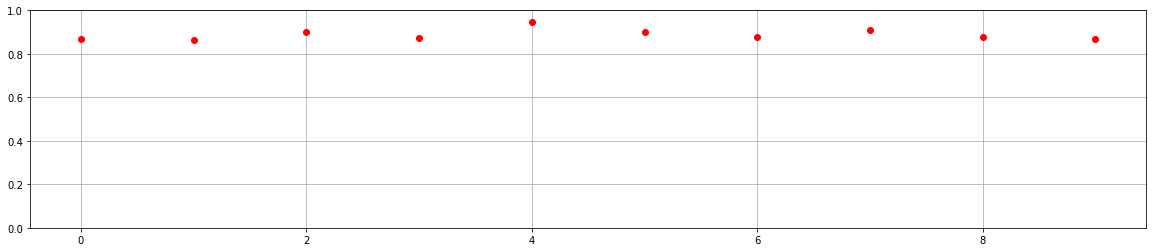

In [ ]:
Area = np.empty(0)
for i in range(0,5): 
    for j in range(i+1,5):
        Area = np.append(Area, area(x,y[:,i],y[:,j]))


plt.figure(figsize=(20,4))
plt.plot(Area,'ro')
plt.ylim(0,1)
plt.grid (True)
plt.show()

In [ ]:
DE = np.std (Area)
print (DE)

0.02385265637766248


### El desvio estándar es: 0.02385265637766248, además como que los valores se encuentran proximos a 1, se pueden considerar a las señales son bastante similares. 

### Por otra parte, podríamos decir que señal es estacionaria para segmentos de 700ms.

In [ ]:
from FCalculo_de_la_cdf_a_partir_de_la_pdf_Version1 import cdf
from scipy.stats import wasserstein_distance

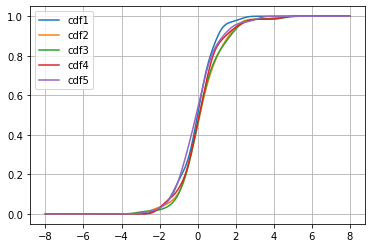

In [ ]:
cdf1 = cdf(x,y1)
cdf2 = cdf(x,y2)
cdf3 = cdf(x,y3)
cdf4 = cdf(x,y4)
cdf5 = cdf(x,y5)

plt.plot(x,cdf1)
plt.plot(x,cdf2)
plt.plot(x,cdf3)
plt.plot(x,cdf4)
plt.plot(x,cdf5)
plt.legend (("cdf1","cdf2","cdf3","cdf4","cdf5"))
plt.grid (True)
plt.show()

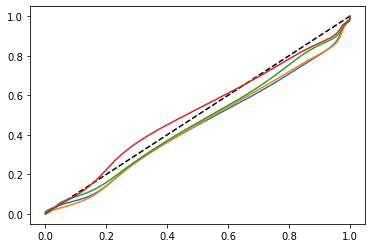

In [ ]:
plt.plot(cdf1,cdf1,"--",color="black") #curva 45°
plt.plot(cdf1,cdf2)
plt.plot(cdf1,cdf3)
plt.plot(cdf1,cdf4)
plt.plot(cdf1,cdf5)
plt.show()

In [ ]:
from FAreabajolacurvaROC import AUC

importing Jupyter notebook from FAreabajolacurvaROC.ipynb


In [ ]:
AUC(cdf2,cdf3)

0.4987355138466876

In [ ]:
wasserstein_distance(y1,y2,cdf1,cdf2)


0.013732929688564544

#### Cuánto más parecidas sean, más similar a la recta de 45°. Cuánto más se parezcan cdf1 y cdf2, más próxima a 1/2 será el área bajo la curva ROC. En este caso el área bajo las curvas ROC es de 0.4987355138466876, lo cual indican que son bastante similares.

#### Finalmente la señal es estacionaria para segmentos de 700ms

### La distancia de Wassertein es de 0.013732929688564544 lo cual implica que se neecesita "menor movimiento de tierra" para que las señales sean similares. Entonces podemos decir que son muy parecidas entre sí. Finalmente la señal es estacionaria para segmentos de 700ms.

- - -